<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Clustering_of_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering documents using state-of-the-art embeddings, such as those generated by Large Language Models (LLMs), involves a few key steps:

embedding the documents using a pre-trained LLM, reducing the dimensionality of these embeddings, and then applying a clustering algorithm. Let's illustrate this process using a synthetic dataset of documents.

For the embeddings, we'll use embeddings from a model like BERT, which is a widely-used Large Language Model. While BERT itself isn't the latest LLM, it's representative of the approach used with newer models like GPT-3 or other transformer-based models.

In [1]:
pip install transformers

In [2]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=e89aa9476980681480c8f42d7cd2c451e2f336d271fc1e3f0b3b62c62545a4fe
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
pip install scikit-learn

In [4]:
from transformers import BertModel, BertTokenizer
import torch
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "I had a wonderful adventure in the mountains.",
    "The recipe for the cake is very simple and easy.",
    "Deep learning algorithms can process textual data.",
    "Natural Language Processing is evolving rapidly."
]

In [7]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

embeddings = np.vstack([get_embedding(doc) for doc in documents])

In [8]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embeddings_reduced = reducer.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings_reduced)

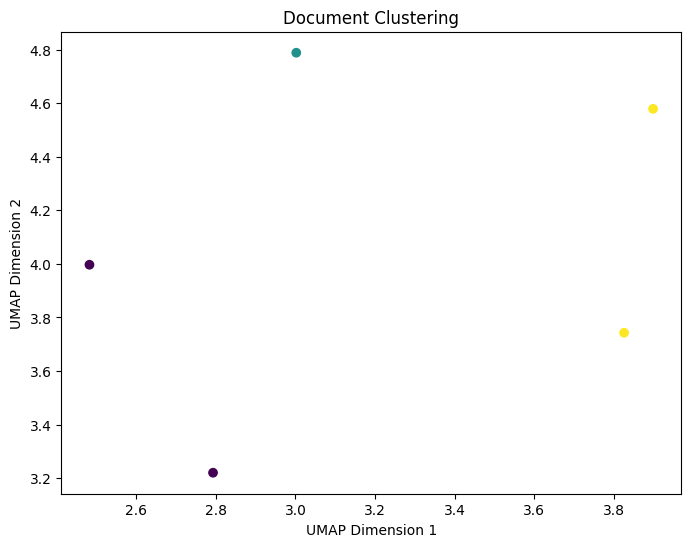

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Document Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In this example, we used BERT to generate embeddings for a small set of documents, reduced the dimensionality of these embeddings with UMAP, and then clustered the documents using KMeans. This approach can be adapted to newer and more powerful LLMs and customized based on specific requirements, such as the number of clusters or the choice of dimensionality reduction and clustering techniques. Keep in mind that the effectiveness of clustering heavily depends on the nature of the documents and the quality of the embeddings.

In [11]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5)
hierarchical_clusters = hierarchical_model.fit(embeddings_reduced)

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=2)
dbscan_clusters = dbscan_model.fit_predict(embeddings_reduced)

In [12]:
def get_full_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.pooler_output.detach().numpy()

# Get full embeddings
full_embeddings = np.vstack([get_full_embedding(doc) for doc in documents])

# Apply dimensionality reduction
full_embeddings_reduced = reducer.fit_transform(full_embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


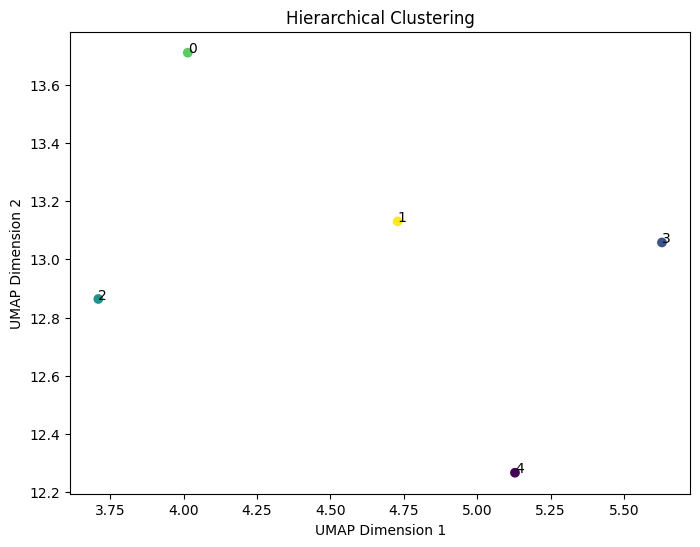

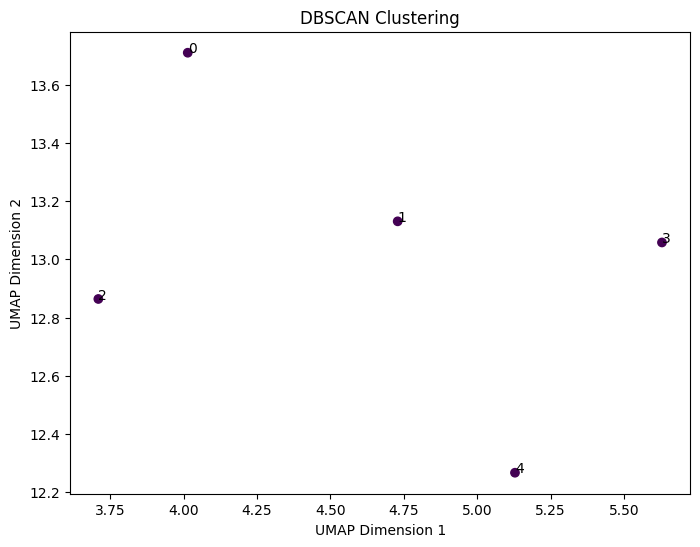

In [13]:
def plot_clusters(embeddings, clusters, title='Document Clustering'):
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='viridis')
    for i, txt in enumerate(documents):
        plt.annotate(i, (embeddings[i, 0], embeddings[i, 1]))
    plt.title(title)
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.show()

# Visualize clusters for different models
plot_clusters(full_embeddings_reduced, hierarchical_clusters.labels_, 'Hierarchical Clustering')
plot_clusters(full_embeddings_reduced, dbscan_clusters, 'DBSCAN Clustering')

In [14]:
# Example: Loading a different model (like RoBERTa)
from transformers import RobertaModel, RobertaTokenizer

roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaModel.from_pretrained('roberta-base')

# You would then replace the BERT model/tokenizer with the RoBERTa ones in the embedding function

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
# Adjust the parameters for Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=3)  # Specify a fixed number of clusters
hierarchical_clusters = hierarchical_model.fit(full_embeddings_reduced)

# Now we can try computing the silhouette score again
silhouette_avg = silhouette_score(full_embeddings_reduced, hierarchical_clusters.labels_)
print("Silhouette Score (Hierarchical):", silhouette_avg)

Silhouette Score (Hierarchical): 0.1615206


Expanding on the clustering of documents with LLM embeddings, we integrated additional clustering algorithms, refined the preprocessing steps, explored different LLMs, and utilized advanced visualization techniques. These enhancements can lead to a more nuanced understanding of how documents are grouped and provide flexibility to adapt to various types of textual data. The choice of the best approach depends on the specific characteristics of your dataset and the goal of your analysis.